Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Best Parameters: {'C': 10.0, 'epsilon': 0.01, 'max_iter': 5000}
Fine-Tuned Linear SVR - Mean Squared Error: 0.007042666186220631
Fine-Tuned Linear SVR - R-squared: -0.02751679974370136


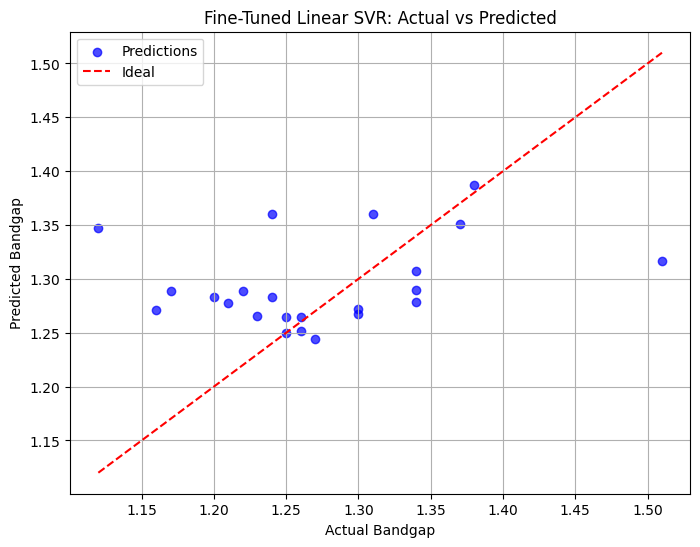

In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = 'Pb Sn .csv'  # Update with the correct path
data = pd.read_csv(file_path)

if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

composition_columns = ['FA', 'MA', 'Cs', 'Pb', 'Sn', 'Br', 'I','Cl']
target_column = 'Bandgap'

data = data.dropna(subset=[target_column])
X = data[composition_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'epsilon': [0.01, 0.1, 0.2],
    'max_iter': [1000, 5000, 10000],
}
grid_search = GridSearchCV(LinearSVR(random_state=42), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Fine-Tuned Linear SVR - Mean Squared Error: {mse}")
print(f"Fine-Tuned Linear SVR - R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.title('Fine-Tuned Linear SVR: Actual vs Predicted')
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.legend()
plt.grid(True)
plt.show()
